In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles,make_classification
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X,y = make_circles(n_samples=500, factor = 0.1, noise = 0.35, random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [3]:
X.shape

(500, 2)

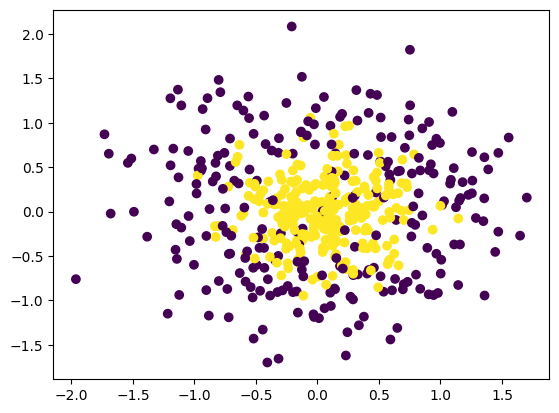

In [4]:
plt.scatter(X[:,0],X[:,1],c = y)


Text(0.5, 1.0, 'Training Data')

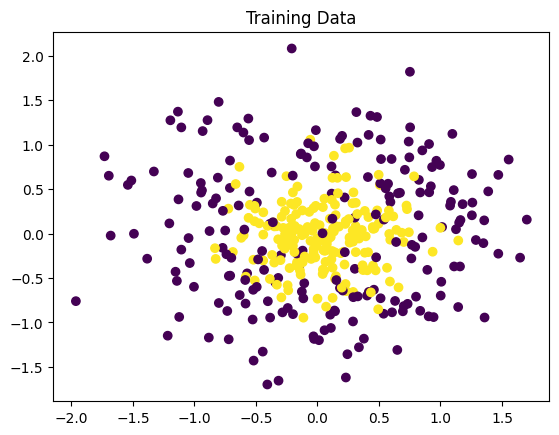

In [5]:
plt.scatter(X_train[:,0],X_train[:,1],c = y_train)
plt.title("Training Data")

Text(0.5, 1.0, 'Testing Data')

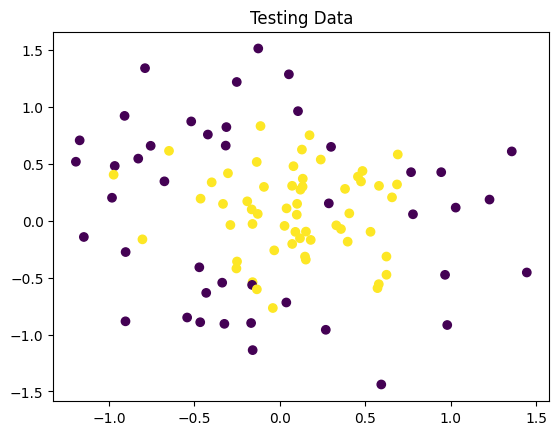

In [6]:
plt.scatter(X_test[:,0],X_test[:,1],c = y_test)
plt.title("Testing Data")

Decision Tree vs Random Forest

In [7]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

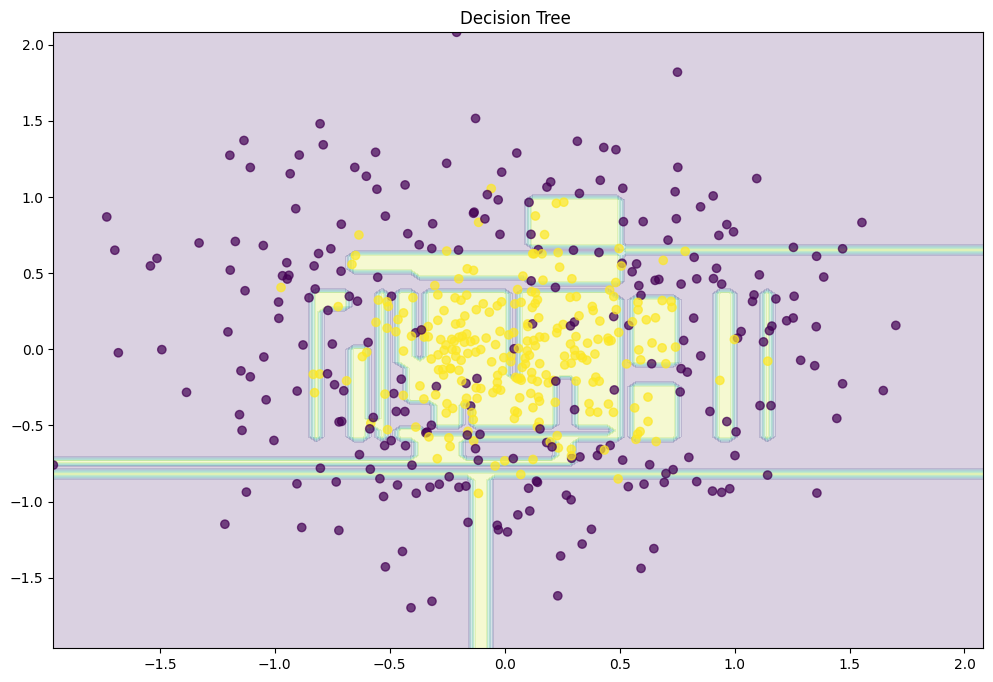

In [8]:
plt.figure(figsize=(12, 8))

# Create mesh grid for plotting decision boundaries
x_range = np.linspace(X.min(),X.max(), 100)
xx1,xx2 = np.meshgrid(x_range,x_range)

# Predict class labels for each point in the mesh grid
y_hat = dtree.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)

plt.contourf(xx1, xx2, y_hat, alpha = 0.2)
plt.scatter(X[:,0],X[:,1], c= y, cmap = 'viridis', alpha = .7 )
plt.title("Decision Tree ")
plt.show()

The Decision Tree algorithm gives the low bias(less error in train data) on the train data but high variance because it plot the decision boundries over the purple also. if you change the data it gives the high variance

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500, random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

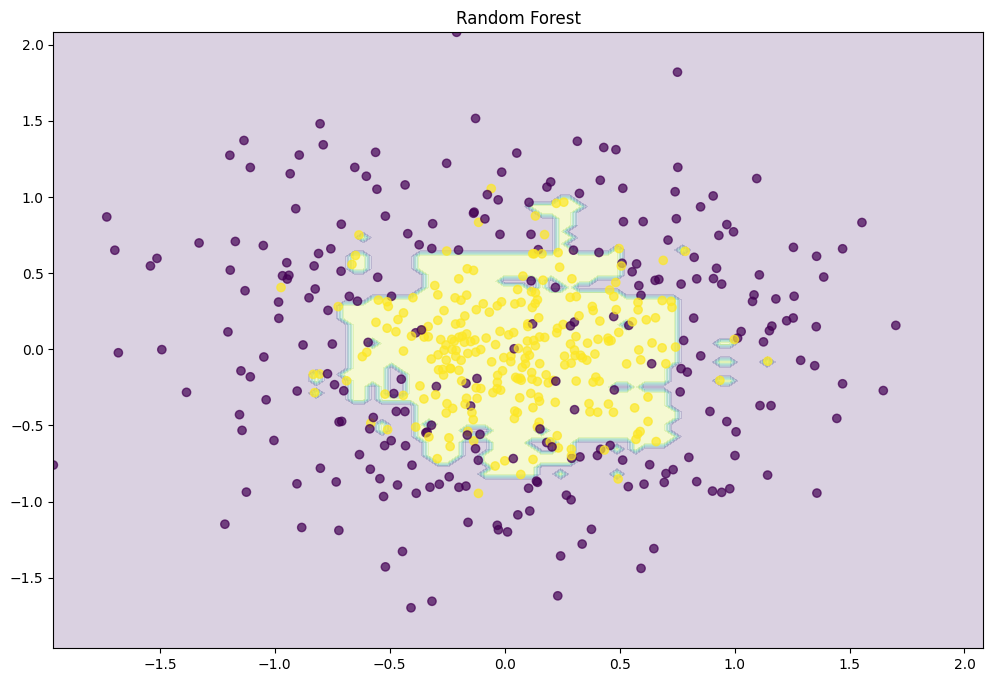

In [10]:
plt.figure(figsize=(12, 8))

# Create mesh grid for plotting decision boundaries
x_range = np.linspace(X.min(),X.max(), 100)
xx1,xx2 = np.meshgrid(x_range,x_range)

# Predict class labels for each point in the mesh grid
y_hat = rf.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)

plt.contourf(xx1, xx2, y_hat, alpha = 0.2)
plt.scatter(X[:,0],X[:,1], c= y, cmap = 'viridis', alpha = .7 )
plt.title("Random Forest")
plt.show()

Bagging vs Random Forest

In [11]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)
df = pd.DataFrame(X,columns = ['col1','col2','col3','col4','col5'])
df['target'] = y
df.head()

,col1,col2,col3,col4,col5,target
0,-2.127303,0.894951,-0.600518,-1.191874,-1.573884,0
1,1.358732,-0.317099,-1.022977,-0.844633,-1.257109,1
2,-0.357856,-0.732070,1.007794,0.276790,-2.545119,0
3,-0.908792,0.922910,2.763722,1.154730,-0.059090,0
4,-1.616429,0.557361,-2.640315,-3.413477,-2.837048,0


In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree
bag = BaggingClassifier(max_features=2)

In [13]:
bag.fit(df.iloc[:,:5], df.iloc[:,-1])

BaggingClassifier(max_features=2)

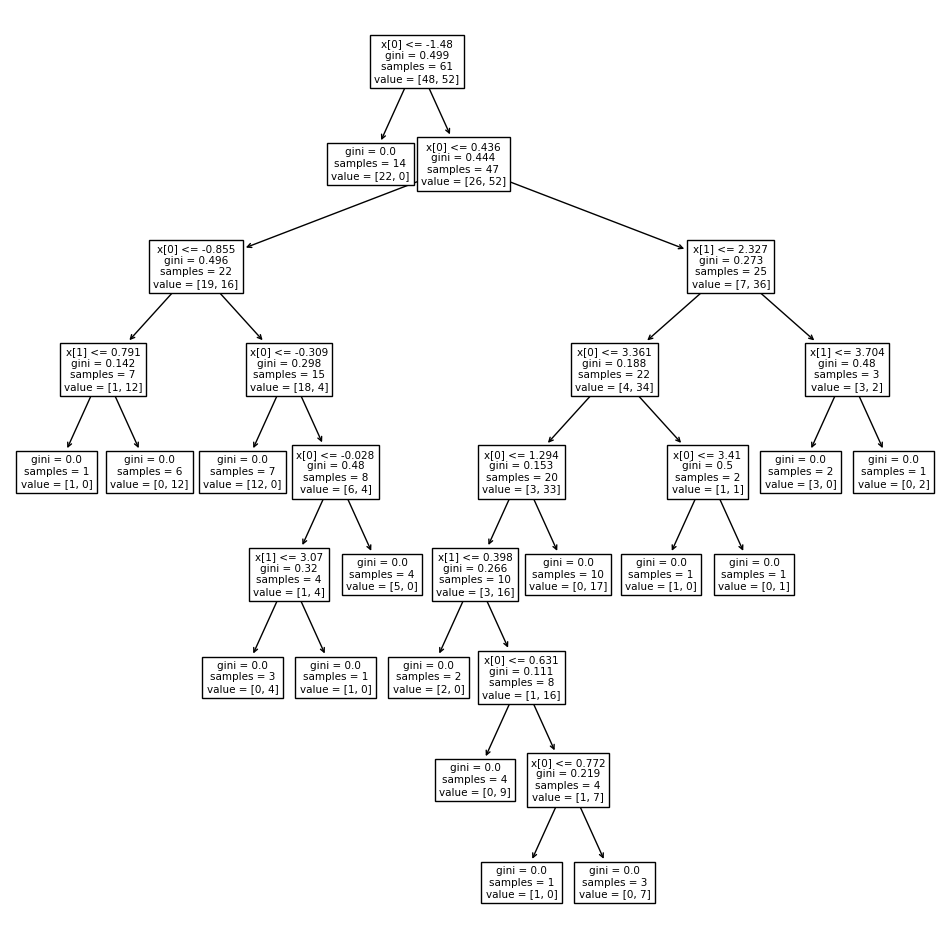

In [14]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0]) 
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features=2)
rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier(max_features=2)

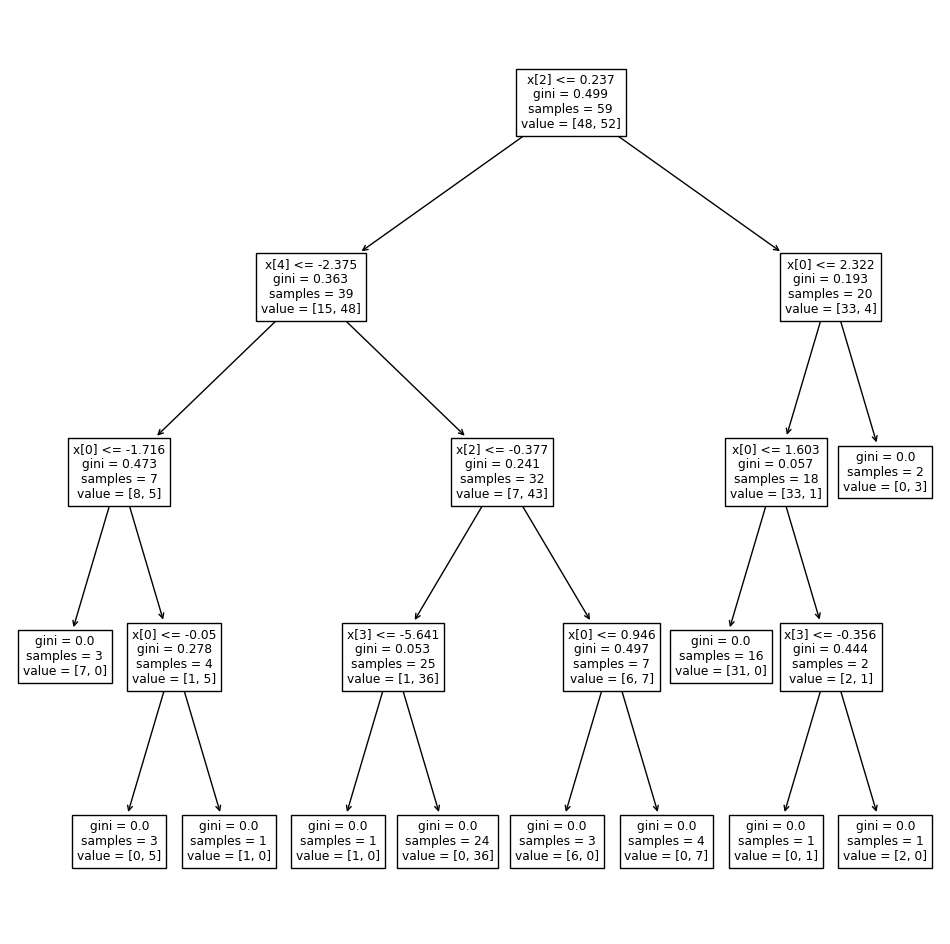

In [18]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[0])
plt.show()